In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
##REad the dataset
df=pd.read_csv('/content/drive/MyDrive/regression dataset/height-weight.csv')

As the data set having only one independent and one dependent feature thats why this is simple linear regression.


In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

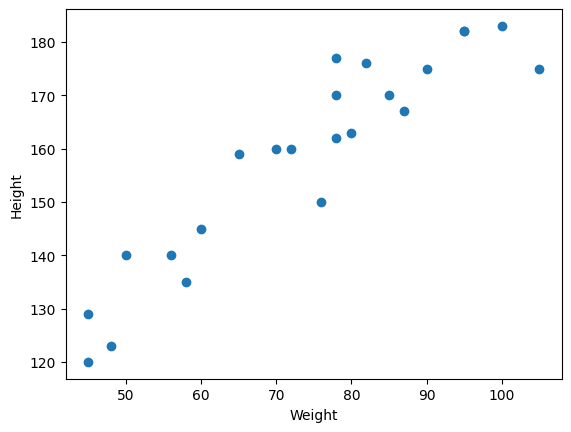

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [20]:
##divide our dataset into independent and dependent features
X=df[['Weight']] # independent feature
y=df[['Height']]# dependent feature

deviding the data into train test splits using a librery named **sklearn(used for trainnig the models)**.

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
# When you set random_state=42, you are telling the function to use a specific sequence of random numbers.
#This means that every time you run your code with random_state=42, you will get the same split of data.

In [22]:
y_train

,Height
12,175
1,135
13,183
5,162
2,123
11,182
20,129
3,145
4,160
18,150


In [23]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


**Standardization** ensures that features in a dataset are on the same scale, which helps in training linear regression models effectively by making sure no feature dominates simply due to its scale. It also aids in faster and more stable convergence of optimization algorithms and allows for better comparison of feature importance.

In [24]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

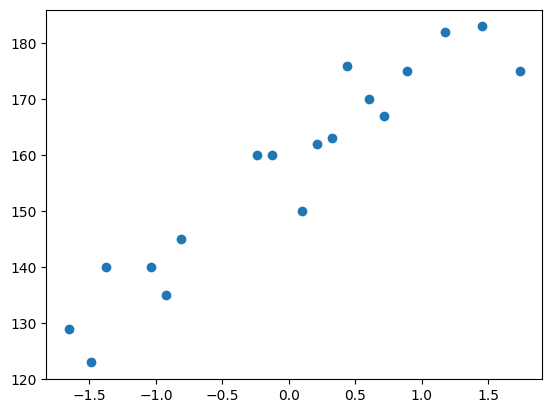

In [25]:
plt.scatter(X_train,y_train)

Importing linear regressor which draw a best fit line.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor=LinearRegression()

In [28]:
regressor

LinearRegression()

In [29]:
type(X_train)

numpy.ndarray

In [31]:
X_train=np.array(X_train).reshape(-1,1) # note= here -1 represent the number of samples. that is one in this case as it data set with one independent feature.
X_test=np.array(X_test).reshape(-1,1)

In [32]:
y_train.shape

(18, 1)

In [33]:
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [[17.03440872]]
Intercept :  [157.5]


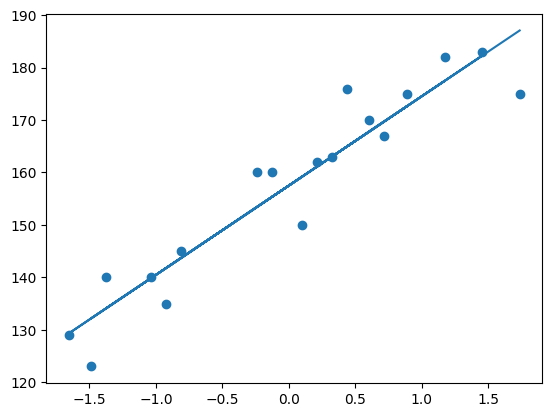

In [37]:
plt.scatter(X_train,y_train)# real co-ordinates from data set
plt.plot(X_train,regressor.predict(X_train))# predicted co-ordinates from linear regression

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

In [38]:
y_pred_test=regressor.predict(X_test)

In [39]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


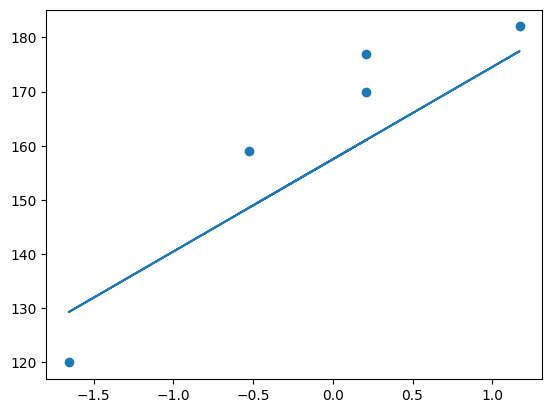

In [40]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [41]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [43]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [45]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [46]:
print(score)

0.776986986042344


## R square
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [47]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [48]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [54]:
# lets check our model
regressor.predict(scaler.transform([[64]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[147.60202823]])

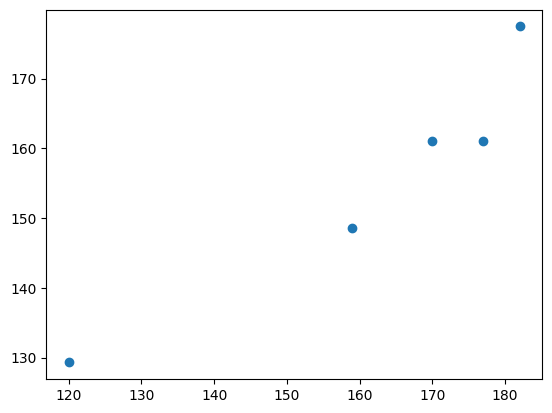

In [55]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)



In [56]:
## Residuals
residuals=y_test-y_pred_test

residuals



,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


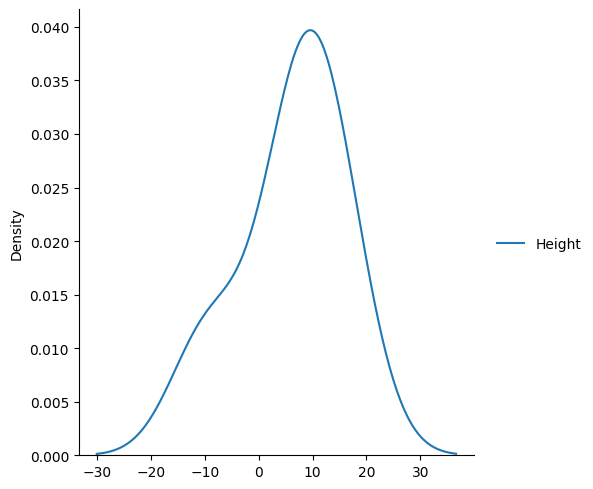

In [57]:
## Plot this residuals
import seaborn as sns
sns.displot(residuals,kind="kde")



**Significance of the Plot**
Assess Model Fit:

**Pattern Recognition:** Ideally, residuals should be randomly scattered around the horizontal line (residual = 0) with no discernible pattern. This randomness indicates that the model is capturing the underlying trends in the data well.


**Pattern Indication:** If you observe a pattern (e.g., a curve, clustering, or any systematic structure), it might suggest that the model is not capturing some underlying relationships or that the model assumptions (like linearity) might be violated.

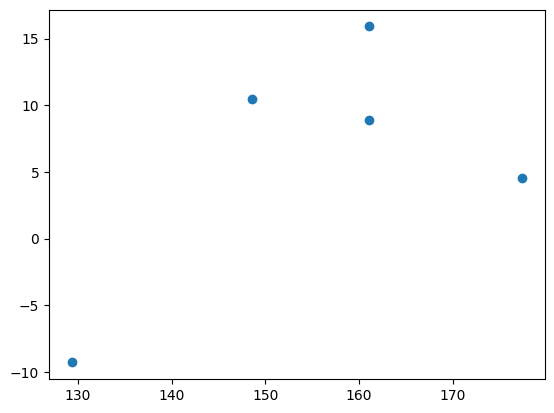

In [58]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

## Using OLS

In [59]:
import statsmodels.api as sm

In [61]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

In [63]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Sat, 17 Aug 2024   Prob (F-statistic):                       0.661
Time:                        05:16:22   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [64]:
regressor.coef_

array([[17.03440872]])

**observation:** As both of the model gives same cofficeant(the corealation of independent and dependent variable). hence both of the model works well.